### **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor

### **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Master's degree/cyber security/Phishing_Legitimate_full.csv")
data.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,...,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,...,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1


### **Meta Data**

In [ ]:
# Display the dataset size
data.shape

(10000, 50)

In [ ]:
# Display basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

* The dataset consists of 10,000 entries and 50 features.
* The dataset size is medium.
* All features are numeric. Most features are integer-based, except for a few floating-point values.
* There aren't any missing values.
* The CLASS_LABEL indicates that that it's a binary classification problem of detecting phishing attacks.

### **Data Statistics**

In [ ]:
# Get basic statistics for the dataset features
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* **UrlLength:**
Ranges from 12 to 204 characters, with a mean of 70. Longer URLs might be more associated with phishing.

* **NumDots:**
Some URLs have many dots, possibly indicating subdomain abuse (phishing).

* **NumDash (hyphens in URL):**
High variation (mean = 1.8, std = 3.1), indicating that some phishing URLs may use many dashes for obfuscation.

* **AtSymbol and TildeSymbol:**
Mean close to 0, suggesting that very few URLs use @ or ~, but their presence may indicate phishing attempts.

* **PctExtResourceUrls (percentage of external resources):**
Mean: 35.3% of resources are external, which could be a phishing indicator.
Some websites use 100% external resources, which is highly suspicious.

* **PctNullSelfRedirectHyperlinks:**
High variation, suggesting that some URLs excessively use self-redirecting links (potential phishing strategy).

* **IframeOrFrame:**
34% of websites use iframe elements, which may indicate phishing behavior (used to embed fake login pages).

* **MissingTitle:**
Only 3.2% of websites lack a title, meaning this may be a weak phishing indicator.

* **SubmitInfoToEmail:**
Low mean, but phishing sites may use this to capture credentials via email submissions.

* Several features have min = -1, which may represent categorical encodings for missing or special values.

* Highly skewed features (e.g., PctExtNullSelfRedirectHyperlinksRT) suggest that outlier detection or transformation might be necessary.


In [ ]:
# Check for outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).sum()
outliers.to_frame(name="Outlier Count")

,Outlier Count
id,0
NumDots,470
SubdomainLevel,103
PathLevel,284
UrlLength,446
NumDash,1191
NumDashInHostname,934
AtSymbol,3
TildeSymbol,131
NumUnderscore,1383


I have decided not to handle outliers as they help distinguish phishing from legitimate sites. Also, they are not due to errors but real-world behavior.

**Observations from the outliers:**

1. The top features with a high number of outliers include:
* RelativeFormAction (2487 outliers)
* FrequentDomainNameMismatch (2153 outliers)
* QueryLength (1987 outliers)
* NumQueryComponents (1866 outliers)
* ExtFavicon (1672 outliers)
These features might have extreme values that indicate unusual patterns in URLs, such as form submission behavior, domain mismatches, and etc.

2. Features like PctNullSelfRedirectHyperlinks, PctExtHyperlinks, and AbnormalExtFormActionR also have a significant number of outliers, which suggests that they could be strong indicators of suspicious URLs.

3. Some outliers may be valid but indicate rare cases, which could be valuable for model training.

4. The high number of outliers in certain features suggests that these variables have a skewed distribution.

In [ ]:
# Check for data balance in the target feature
balance = data['CLASS_LABEL'].value_counts()
balance

,count
CLASS_LABEL,
1,5000
0,5000


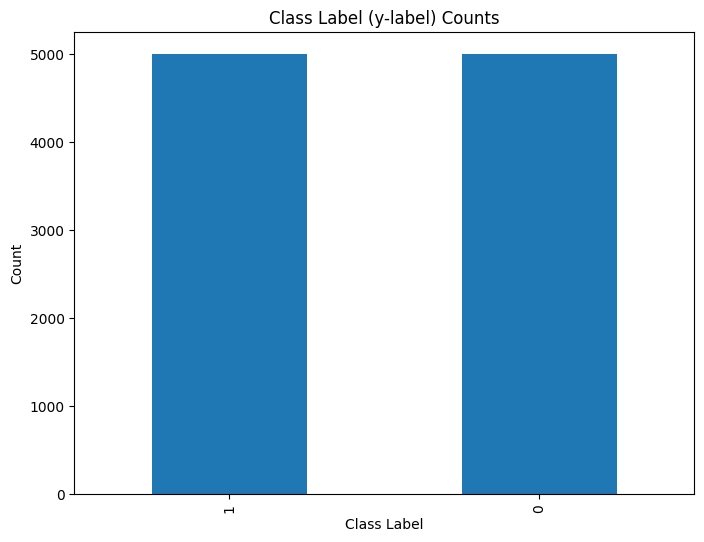

In [ ]:
# Plot the y label
plt.figure(figsize=(8, 6))
balance.plot(kind='bar')
plt.title('Class Label (y-label) Counts')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.show()

The dataset is perfectly balanced, with 5,000 phishing (1) and 5,000 legitimate (0) instances.

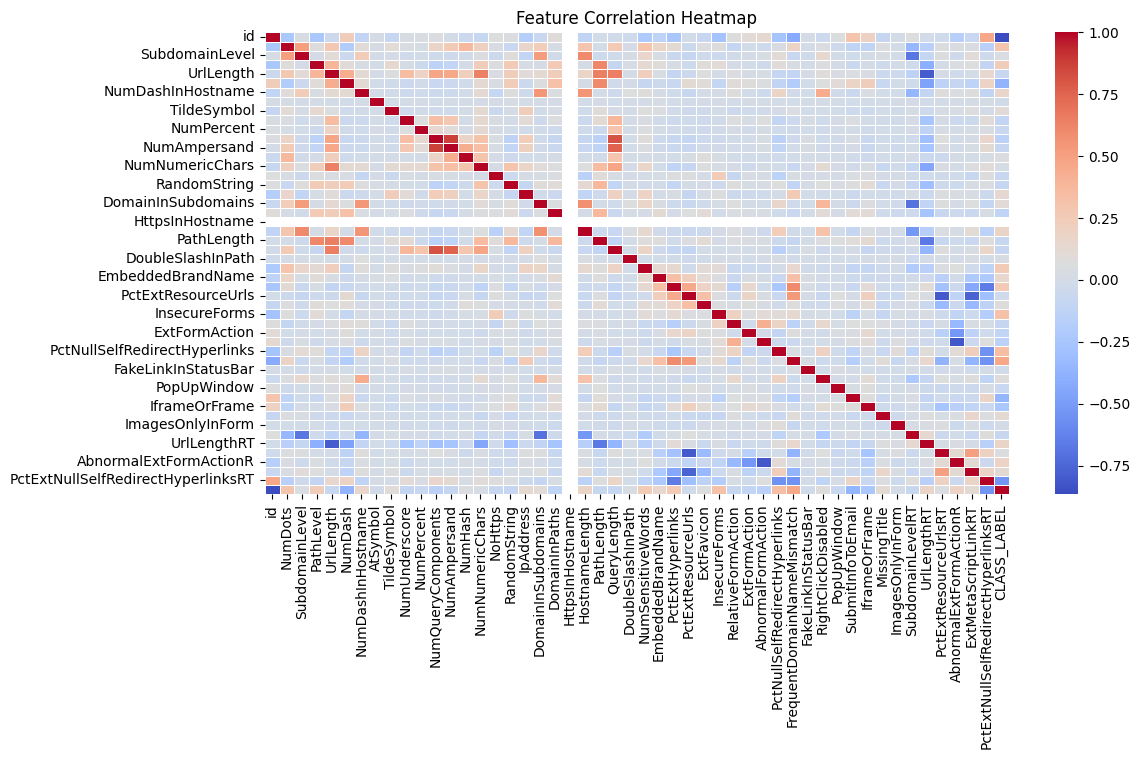

In [ ]:
# Correlation and association
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

* Some features show strong positive or negative correlations with each other.
* Features related to URL length, path level, and query components tend to be positively correlated.
* PctExtHyperlinks and PctExtResourceUrls exhibit strong correlations, suggesting they measure similar aspects of external linking.


In [ ]:
# Compute correlation of each feature with CLASS_LABEL
correlation_with_label = data.corr()["CLASS_LABEL"].drop("CLASS_LABEL").sort_values(ascending=False)

# Convert to DataFrame
correlation_table = correlation_with_label.to_frame(name="Correlation with CLASS_LABEL")
correlation_table

,Correlation with CLASS_LABEL
FrequentDomainNameMismatch,0.463956
PctNullSelfRedirectHyperlinks,0.342806
InsecureForms,0.316380
NumDots,0.294111
PctExtHyperlinks,0.259728
NumSensitiveWords,0.255208
PathLevel,0.229450
AbnormalExtFormActionR,0.185799
UrlLengthRT,0.169513
HostnameLength,0.169157


**1. Strongest Positive Correlations (Phishing Indicators):**
* FrequentDomainNameMismatch (0.46): A strong correlation suggests that phishing websites often use mismatched domains.
* PctNullSelfRedirectHyperlinks (0.34): Higher percentages of null self-redirecting hyperlinks indicate phishing behavior.
* InsecureForms (0.32): Phishing sites tend to have insecure form actions.
* NumDots (0.29): More dots in the URL structure may indicate a phishing attempt.
* PctExtHyperlinks (0.26): A high percentage of external hyperlinks suggests a phishing website.

**2. Strongest Negative Correlations (Legitimate Website Indicators):**
* PctExtNullSelfRedirectHyperlinksRT (-0.54): Suggests that phishing sites avoid certain redirect patterns.
* NumDash (-0.37): Legitimate websites may have more dashes in URLs compared to phishing ones.
* SubmitInfoToEmail (-0.36): Phishing sites may rely less on email submission than expected.
* IframeOrFrame (-0.23): Legitimate websites might use iframes more than phishing ones.

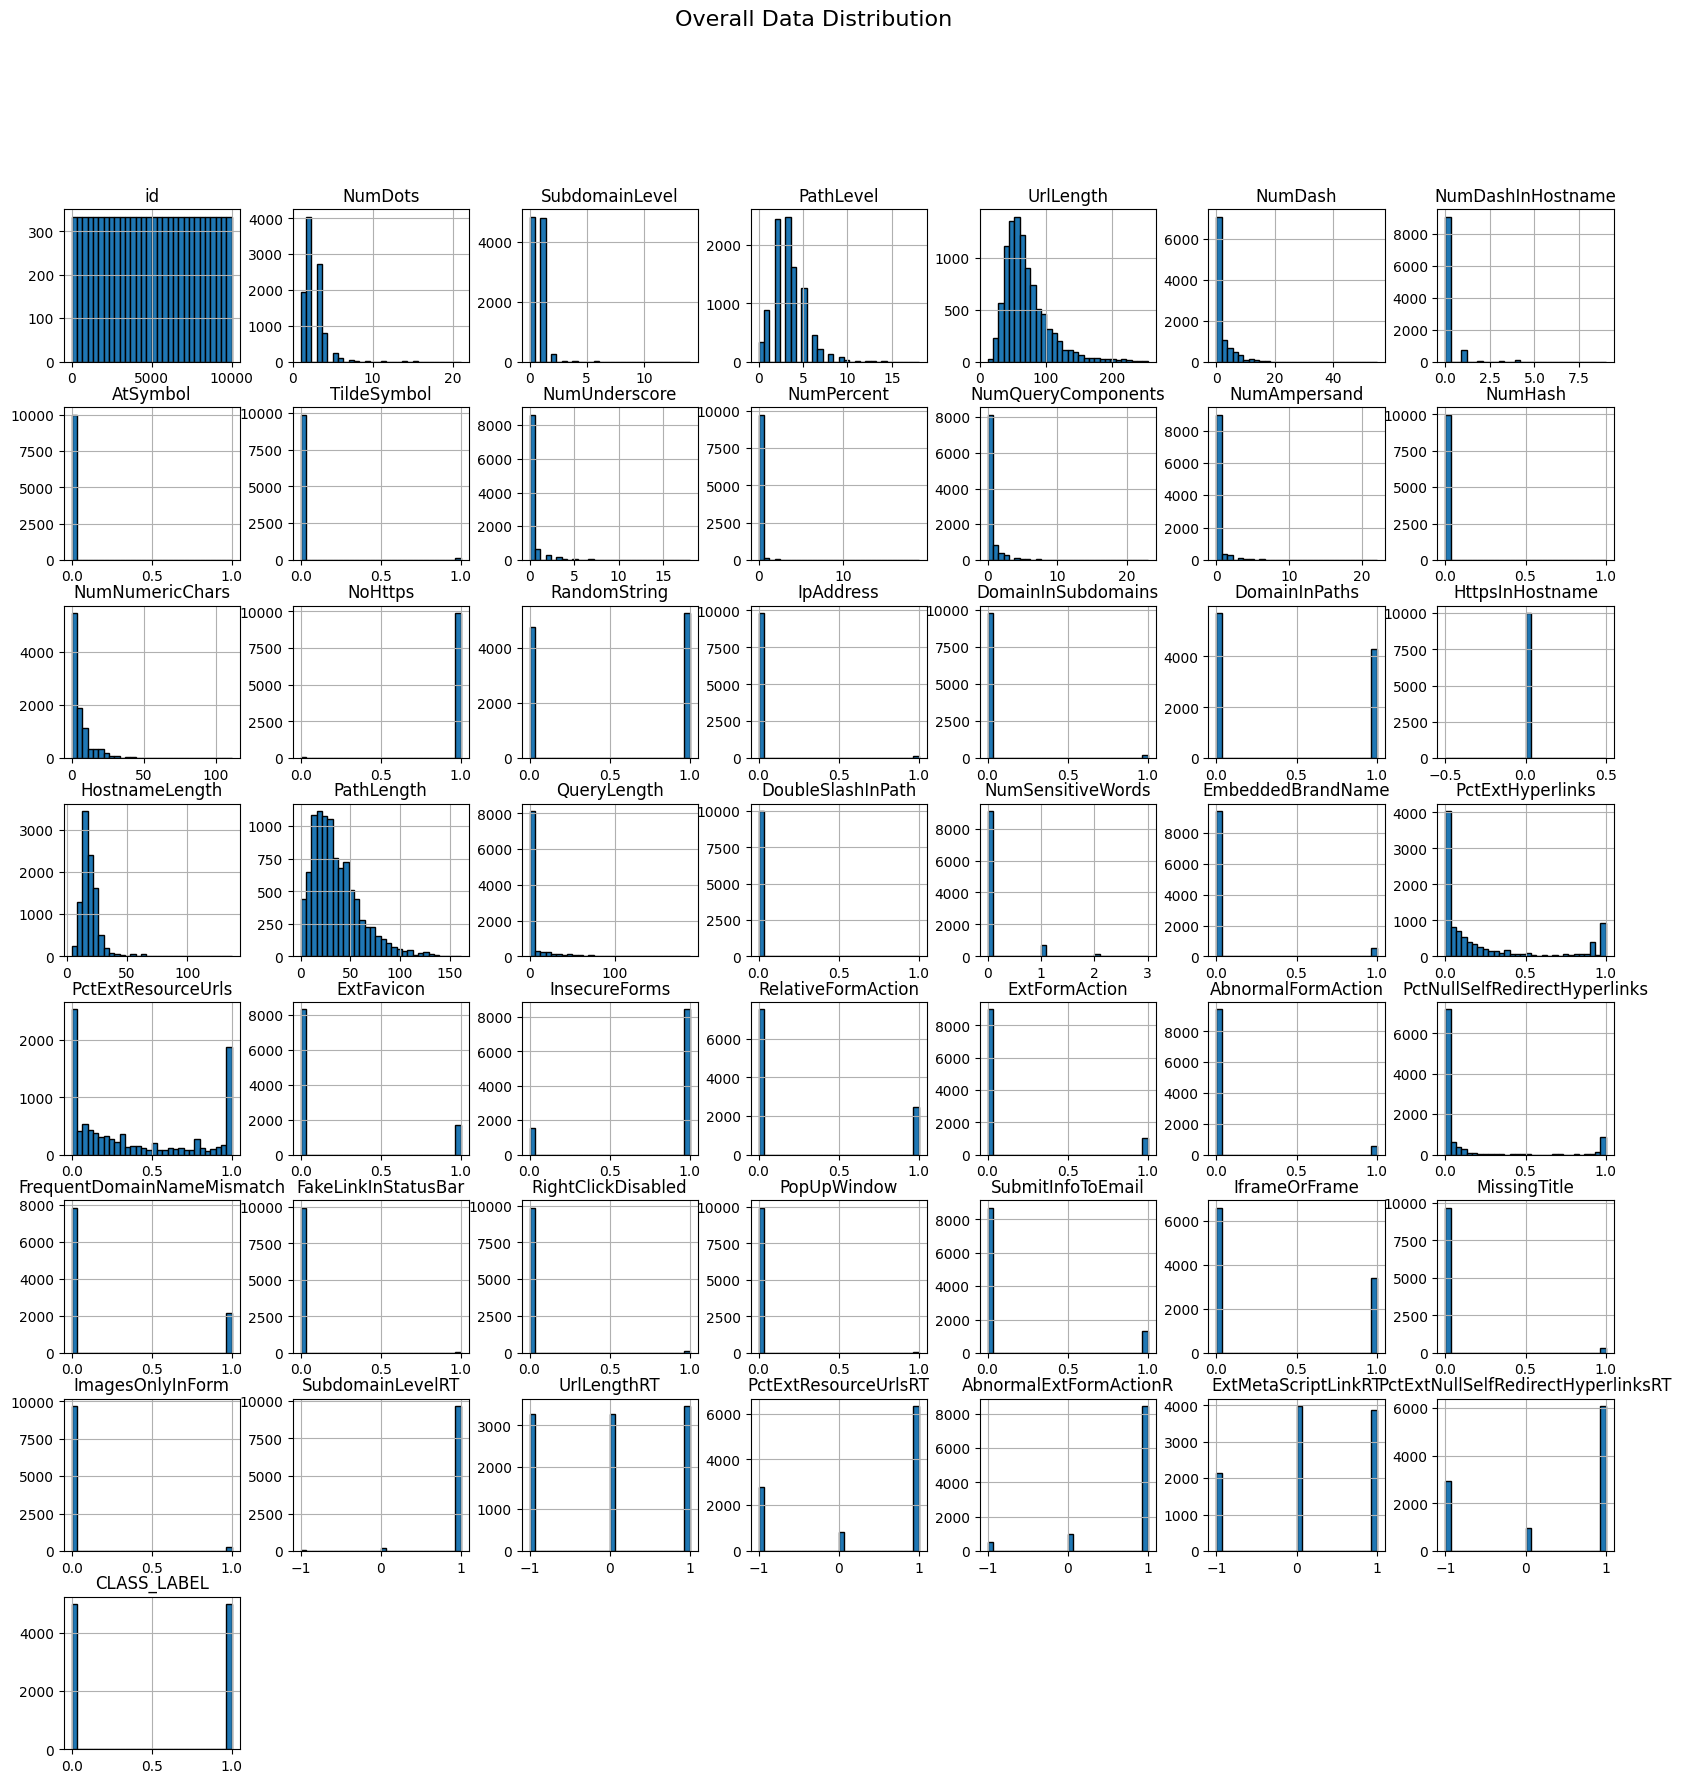

In [ ]:
# Plot distribution of all numerical features in the dataset
data.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.suptitle("Overall Data Distribution", fontsize=16)
plt.show()

* Most features are skewed (e.g., NumDash, QueryLength, PctExtHyperlinks, PctExtResourceUrls, and PctNullSelfRedirectHyperlinks), meaning they have extreme values (outliers).
* Some categorical/binary features (e.g., NoHttps, IpAddress, RightClickDisabled, SubmitInfoToEmail) have distinct 0/1 values.
* Several features are highly concentrated around a few values, suggesting they might not provide significant variance for classification.


### **Feature Selection**

I decided to keep all original featuers as well as thee new ones and perform feature selection to decide which features to keep.

In [ ]:
# Separate features (X) and target variable (y)
# Drop 'CLASS_LABEL' since it's the target we want to predict
# Drop 'id' as it is just an identifier and does not contribute to the prediction

X = data.drop(columns=['CLASS_LABEL', 'id'])
y = data['CLASS_LABEL']

In [ ]:
# Compute mutual information scores for all features

mi_scores = mutual_info_classif(X, y)

# Create a DataFrame for visualization
mi_df = pd.DataFrame({
    "Feature": X.columns,
    "Mutual Information Score": mi_scores
}).sort_values(by="Mutual Information Score", ascending=False)

# Display the scores for reference
mi_df

,Feature,Mutual Information Score
26,PctExtHyperlinks,0.465689
27,PctExtResourceUrls,0.294965
33,PctNullSelfRedirectHyperlinks,0.230846
47,PctExtNullSelfRedirectHyperlinksRT,0.208821
34,FrequentDomainNameMismatch,0.128989
13,NumNumericChars,0.125852
46,ExtMetaScriptLinkRT,0.119479
4,NumDash,0.115174
38,SubmitInfoToEmail,0.076047
0,NumDots,0.060726


I used MI scores for feature selection as it measures the dependency between each feature and the target (CLASS_LABEL), capturing both linear and non-linear relationships. Unlike PCA, MI keeps the original feature meanings, making the model more interpretable.

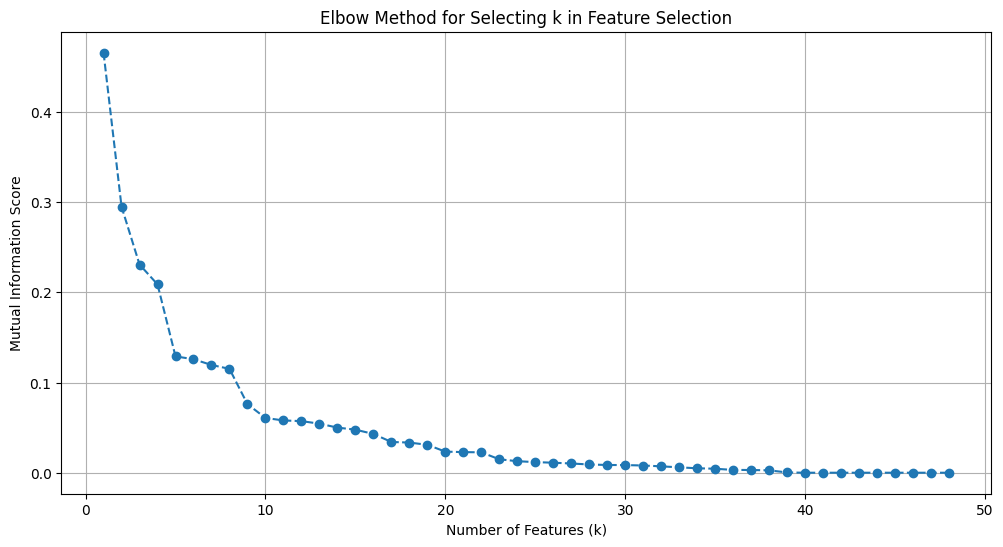

In [ ]:
# Plot the Mutual Information scores to determine the best k for RF model
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(mi_df) + 1), mi_df["Mutual Information Score"], marker='o', linestyle='--')
plt.xlabel("Number of Features (k)")
plt.ylabel("Mutual Information Score")
plt.title("Elbow Method for Selecting k in Feature Selection")
plt.grid()
plt.show()

The plot shows the mutual information scores for each feature ranked in descending order.
* The first 5-10 features contribute the most to the model.
* After k=15, the improvements are minimal.
* Based on this plot, choosing k ≈ 10-15 is ideal.

In [ ]:
# Convert X_scaled back to a DataFrame with original feature names
X_df = pd.DataFrame(X, columns=X.columns)

# Select the top 15 most informative features based on Mutual Information scores
top_15_features_mi = mi_df.head(15)["Feature"].values

# Extract dataset with only the selected features
X_selected_mi = X_df[top_15_features_mi]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected_mi, y, test_size=0.2, random_state=42)

# Display the selected features
selected_features_df = pd.DataFrame(top_15_features_mi, columns=["Top 15 Informative Features"])
selected_features_df


,Top 15 Informative Features
0,PctExtHyperlinks
1,PctExtResourceUrls
2,PctNullSelfRedirectHyperlinks
3,PctExtNullSelfRedirectHyperlinksRT
4,FrequentDomainNameMismatch
5,NumNumericChars
6,ExtMetaScriptLinkRT
7,NumDash
8,SubmitInfoToEmail
9,NumDots


In [ ]:
# Confirm dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 15), (2000, 15), (8000,), (2000,))

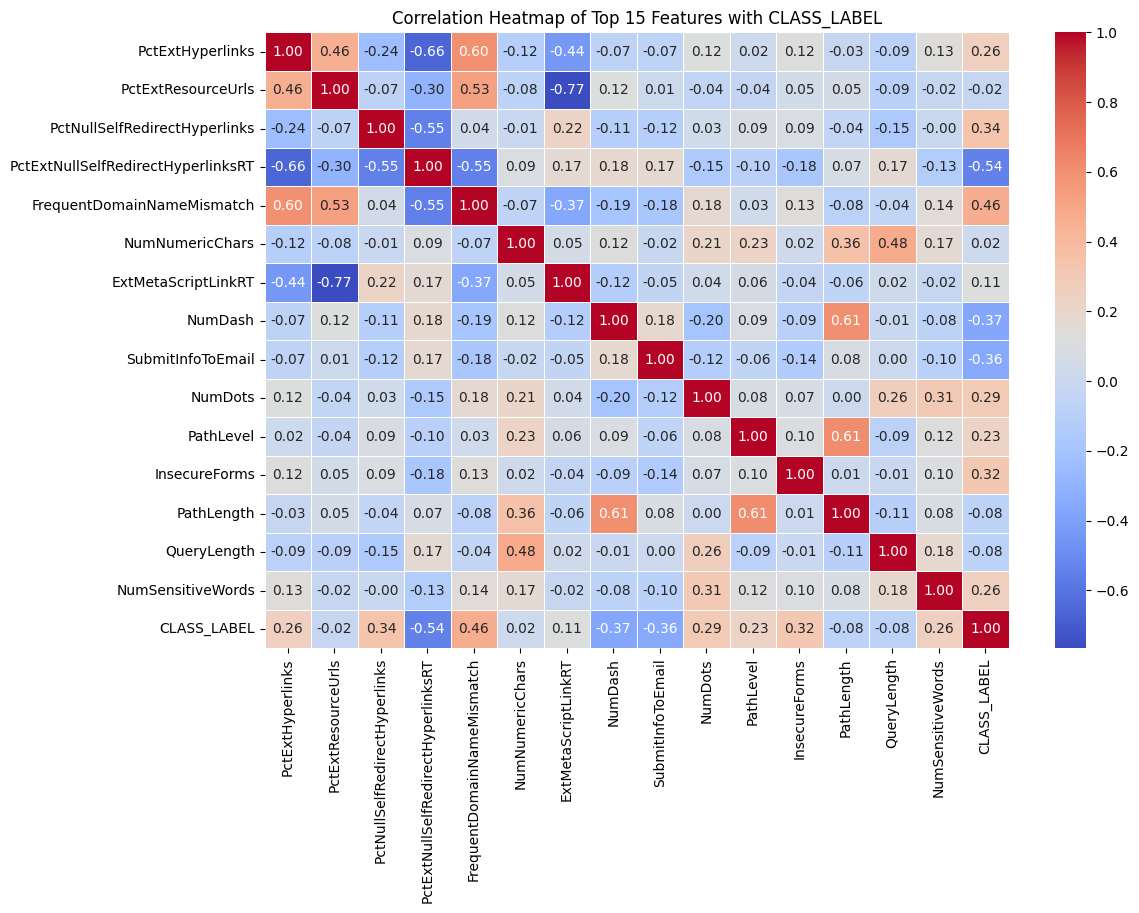

In [ ]:
# Compute correlation matrix for the selected 15 features and CLASS_LABEL
corr_matrix = X_df[top_15_features_mi].join(y).corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Top 15 Features with CLASS_LABEL")
plt.show()

* FrequentDomainNameMismatch (0.46) → Higher in phishing sites.
* PctNullSelfRedirectHyperlinks (0.34) → More redirects found in phishing.
* InsecureForms (0.32) → Higher usage of insecure forms in phishing.
* PctExtNullSelfRedirectHyperlinksRT (-0.54) → More common in legitimate.
* SubmitInfoToEmail (-0.36) → Less used in phishing.
* NumDash (-0.37) → URLs with more dashes tend to be less phishing-prone.

### **Model Training**

I chose to use Random Forest model as it effectively captures patterns in URL structure, is interpretable, and performs well without requiring heavy preprocessing.

I did not use scaling because it is not necessary for Random Forest model that I was planing to use. Random Forest is a tree-based model that is scale-invariant, meaning it does not rely on feature magnitudes or distance-based calculations, unlike models such as SVM or KNN.

In [ ]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
evaluation_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy, precision, recall, f1]
})

evaluation_results

,Metric,Score
0,Accuracy,0.980000
1,Precision,0.977407
2,Recall,0.983202
3,F1-Score,0.980296


This indicates that the model is performing exceptionally well, correctly classifying phishing and legitimate URLs with high precision and recall.

### **Visualizations**

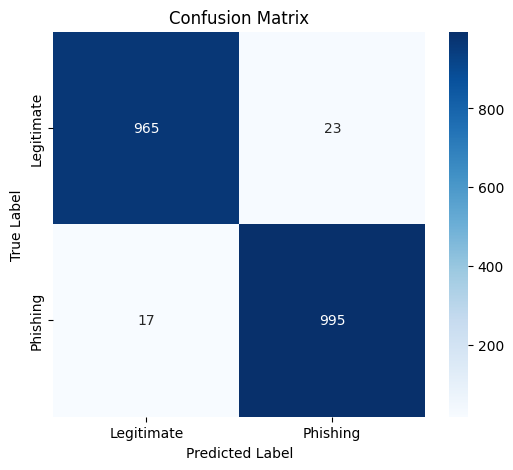

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


* True Positives (991) and True Negatives (963) are high, indicating strong classification.
* False Positives (25) and False Negatives (21) are low, meaning few misclassifications.

<Figure size 800x600 with 0 Axes>

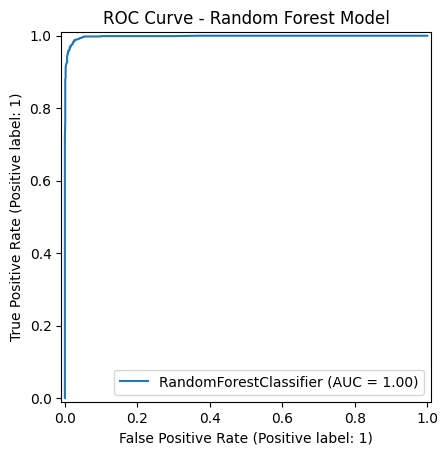

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - Random Forest Model")
plt.show()

AUC = 1.00, indicating a near-perfect classifier.

### **Feature Importance**

In [ ]:
# Extract feature importance from the trained Random Forest model

feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the feature importance
feature_importance_df

,Feature,Importance
0,PctExtHyperlinks,0.232922
3,PctExtNullSelfRedirectHyperlinksRT,0.213014
1,PctExtResourceUrls,0.095092
4,FrequentDomainNameMismatch,0.090633
2,PctNullSelfRedirectHyperlinks,0.064128
7,NumDash,0.051757
6,ExtMetaScriptLinkRT,0.038537
5,NumNumericChars,0.034520
11,InsecureForms,0.034214
10,PathLevel,0.031686


<ipython-input-107-046f27f1f2b5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="coolwarm")


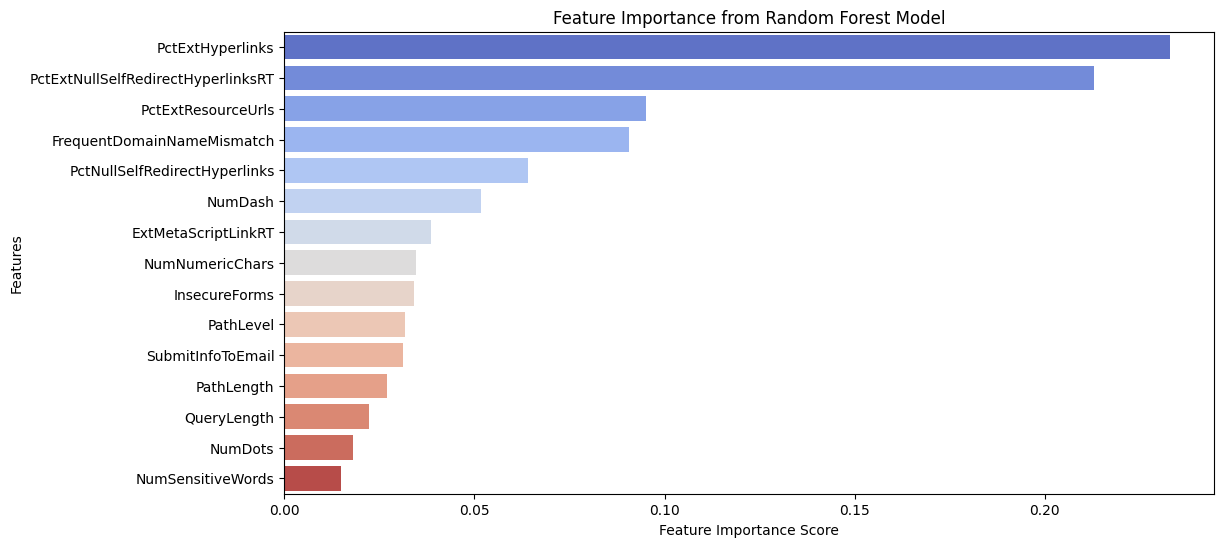

In [ ]:
# Plot feature importance as a bar chart

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest Model")
plt.show()

* The feature importance analysis from the Random Forest model reveals that PctExtHyperlinks, PctExtNullSelfRedirectHyperlinksRT, and PctExtResourceUrls are the most influential features in distinguishing phishing from legitimate websites. These features indicate that phishing sites tend to have a higher percentage of external links and redirects, making them strong indicators for classification.
* Features like FrequentDomainNameMismatch and NumDash also contribute significantly, suggesting that domain inconsistencies and URL structures play a key role in phishing detection.
* Lower-ranked features, such as QueryLength and NumDots, have less impact, implying that not all URL-based attributes are equally useful.